In [1]:
import pandas as pd

In [2]:
datafn = pd.read_csv("../full_variants/caqtls.eu.lcls.benchmarking.all.tsv", sep="\t", header=0)



In [3]:
datafn.columns

Index(['var.chr', 'var.pos_hg38', 'var.allele1', 'var.allele2', 'obs.beta',
       'obs.pval', 'var.isused',
       'pred.enformer.encsr000emt.variantscore.global_sad',
       'pred.enformer.encsr000emt.variantscore.global_sar',
       'pred.chrombpnet.encsr637xsc.variantscore.logfc',
       'pred.chrombpnet.encsr637xsc.variantscore.jsd',
       'pred.chrombpnet.encsr637xsc.variantscore.ips',
       'pred.chrombpnet.encsr637xsc_50m.variantscore.logfc',
       'pred.chrombpnet.encsr637xsc_50m.variantscore.jsd',
       'pred.chrombpnet.encsr637xsc_50m.variantscore.ips',
       'pred.chrombpnet.encsr000emt.variantscore.logfc',
       'pred.chrombpnet.encsr000emt.variantscore.jsd',
       'pred.chrombpnet.encsr000emt.variantscore.ips',
       'pred.enformer.encsr000emt.variantscore.local_logfc', 'var.rsid'],
      dtype='object')

In [4]:
datafn = datafn[datafn["var.isused"]]

In [5]:
datafn.shape

(95065, 20)

In [6]:
import numpy as np

In [7]:
datafn["log10p"] = np.log10(datafn["obs.pval"])*-1

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
from sklearn.metrics import precision_recall_curve
from scipy.stats import pearsonr

random_bc = []
chrombpnet = {}
chrombpnet_pear = {}
chrombpnet_pear1 = {}
chrombpnet_pear_abs = {}
chrombpnet_pear_abs1 = {}
enformer_dnase_roc = []
enformer_dnase_pear = []
enformer_dnase_pear_abs = []
sar_enformer_dnase_roc = []
sar_enformer_dnase_pear = []
sar_enformer_dnase_pear_abs = []

chrombpnet["ChromBPNet DNase (68M)"] = []
chrombpnet["ChromBPNet ATAC (572M)"] = []
chrombpnet["ChromBPNet ATAC (50M)"] = []

chrombpnet_pear["ChromBPNet DNase (68M)"] = []
chrombpnet_pear["ChromBPNet ATAC (572M)"] = []
chrombpnet_pear["ChromBPNet ATAC (50M)"] = []

chrombpnet_pear1["ChromBPNet DNase (68M)"] = []
chrombpnet_pear1["ChromBPNet ATAC (572M)"] = []
chrombpnet_pear1["ChromBPNet ATAC (50M)"] = []

chrombpnet_pear_abs["ChromBPNet DNase (68M)"] = []
chrombpnet_pear_abs["ChromBPNet ATAC (572M)"] = []
chrombpnet_pear_abs["ChromBPNet ATAC (50M)"] = []
chrombpnet_pear_abs1["ChromBPNet DNase (68M)"] = []
chrombpnet_pear_abs1["ChromBPNet ATAC (572M)"] = []
chrombpnet_pear_abs1["ChromBPNet ATAC (50M)"] = []

for threshold in np.arange(6,25,2):
   
    dataf1 = datafn[datafn["log10p"]>threshold]
    dataf1["obs.label"] = 1

    
    dataf2 = datafn[datafn["log10p"]<3]
    dataf2["obs.label"] = 0

    
    
    dataf = pd.concat([dataf1, dataf2])
    
    total = dataf.shape[0]
    sigs = sum(dataf["obs.label"])
    print("sig",sigs)
    print(total)
    print(np.round(sigs/total,3))
    
    random_bc.append(np.round(sigs/total,3))
    
    roc_auc = metrics.average_precision_score(dataf["obs.label"], abs(dataf["pred.chrombpnet.encsr000emt.variantscore.ips"]))
  
    pear = pearsonr(dataf1["pred.chrombpnet.encsr000emt.variantscore.logfc"], dataf1["obs.beta"])[0]
    chrombpnet_pear["ChromBPNet DNase (68M)"].append(pear)
    pear = pearsonr(dataf1["pred.chrombpnet.encsr000emt.variantscore.jsd"]*np.sign(dataf1["pred.chrombpnet.encsr000emt.variantscore.logfc"]), dataf1["obs.beta"])[0]
    chrombpnet_pear1["ChromBPNet DNase (68M)"].append(pear)
    
    pear = pearsonr(abs(dataf1["pred.chrombpnet.encsr000emt.variantscore.logfc"]), abs(dataf1["obs.beta"]))[0]
    chrombpnet_pear_abs["ChromBPNet DNase (68M)"].append(pear)
    pear = pearsonr(abs(dataf1["pred.chrombpnet.encsr000emt.variantscore.jsd"]), abs(dataf1["obs.beta"]))[0]
    chrombpnet_pear_abs1["ChromBPNet DNase (68M)"].append(pear)

    chrombpnet["ChromBPNet DNase (68M)"].append(roc_auc)

    roc_auc = metrics.average_precision_score(dataf["obs.label"], abs(dataf["pred.chrombpnet.encsr637xsc.variantscore.ips"]))

    pear = pearsonr(dataf1["pred.chrombpnet.encsr637xsc.variantscore.logfc"], dataf1["obs.beta"])[0]
    chrombpnet_pear["ChromBPNet ATAC (572M)"].append(pear)
    pear = pearsonr(abs(dataf1["pred.chrombpnet.encsr637xsc.variantscore.logfc"]), abs(dataf1["obs.beta"]))[0]
    chrombpnet_pear_abs["ChromBPNet ATAC (572M)"].append(pear)

    pear = pearsonr(dataf1["pred.chrombpnet.encsr637xsc.variantscore.jsd"]*np.sign(dataf1["pred.chrombpnet.encsr637xsc.variantscore.logfc"]), dataf1["obs.beta"])[0]
    chrombpnet_pear1["ChromBPNet ATAC (572M)"].append(pear)
    pear = pearsonr(abs(dataf1["pred.chrombpnet.encsr637xsc.variantscore.jsd"]), abs(dataf1["obs.beta"]))[0]
    chrombpnet_pear_abs1["ChromBPNet ATAC (572M)"].append(pear)
  
  
    chrombpnet["ChromBPNet ATAC (572M)"].append(roc_auc)
    
    roc_auc = metrics.average_precision_score(dataf["obs.label"], abs(dataf["pred.chrombpnet.encsr637xsc_50m.variantscore.ips"]))
    pear = pearsonr(dataf1["pred.chrombpnet.encsr637xsc_50m.variantscore.logfc"], dataf1["obs.beta"])[0]
    chrombpnet_pear["ChromBPNet ATAC (50M)"].append(pear)
    pear = pearsonr(abs(dataf1["pred.chrombpnet.encsr637xsc_50m.variantscore.logfc"]), abs(dataf1["obs.beta"]))[0]
    chrombpnet_pear_abs["ChromBPNet ATAC (50M)"].append(pear)
 
    pear = pearsonr(dataf1["pred.chrombpnet.encsr637xsc_50m.variantscore.jsd"]*np.sign(dataf1["pred.chrombpnet.encsr637xsc_50m.variantscore.logfc"]), dataf1["obs.beta"])[0]
    chrombpnet_pear1["ChromBPNet ATAC (50M)"].append(pear)
    pear = pearsonr(abs(dataf1["pred.chrombpnet.encsr637xsc_50m.variantscore.jsd"]), abs(dataf1["obs.beta"]))[0]
    chrombpnet_pear_abs1["ChromBPNet ATAC (50M)"].append(pear)

  
    chrombpnet["ChromBPNet ATAC (50M)"].append(roc_auc)

    roc_auc = metrics.average_precision_score(dataf["obs.label"], abs(dataf["pred.enformer.encsr000emt.variantscore.local_logfc"]))

    pear = pearsonr(dataf1["pred.enformer.encsr000emt.variantscore.local_logfc"], dataf1["obs.beta"])[0]
    enformer_dnase_pear.append(pear)
    pear = pearsonr(abs(dataf1["pred.enformer.encsr000emt.variantscore.local_logfc"]), abs(dataf1["obs.beta"]))[0]
    enformer_dnase_pear_abs.append(pear)
    
    enformer_dnase_roc.append(roc_auc)
    
    roc_auc = metrics.average_precision_score(dataf["obs.label"], abs(dataf["pred.enformer.encsr000emt.variantscore.global_sar"]))
    pear = pearsonr(dataf1["pred.enformer.encsr000emt.variantscore.global_sar"], dataf1["obs.beta"])[0]
    sar_enformer_dnase_pear.append(pear)
    pear = pearsonr(abs(dataf1["pred.enformer.encsr000emt.variantscore.global_sar"]), abs(dataf1["obs.beta"]))[0]
    sar_enformer_dnase_pear_abs.append(pear)
    
    sar_enformer_dnase_roc.append(roc_auc)


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


sig 7900
95065
0.083
sig 5487
92652
0.059
sig 3957
91122
0.043
sig 2916
90081
0.032
sig 2129
89294
0.024
sig 1507
88672
0.017
sig 1083
88248
0.012
sig 741
87906
0.008
sig 492
87657
0.006
sig 320
87485
0.004


ChromBPNet DNase (68M) [0.2692993038468142, 0.24429129084045964, 0.22728666077885695, 0.20979405089552633, 0.19132471304700965, 0.16829887698969082, 0.15471656471223075, 0.1498598976292122, 0.12889245504020985, 0.12333614414084604]
enf [0.3048471403326882, 0.28129799153082163, 0.2636423164623907, 0.24158548355343812, 0.21982848707205915, 0.1974061790957482, 0.18845527468765977, 0.17959680175677467, 0.15982587573111687, 0.1501709621175263]
enf [0.2184524984682977, 0.18772041040924403, 0.16683479349056032, 0.1441631682664534, 0.12687326020505924, 0.10305571350234992, 0.09262747860595308, 0.07361374440242349, 0.0597817968450374, 0.053252146391617995]


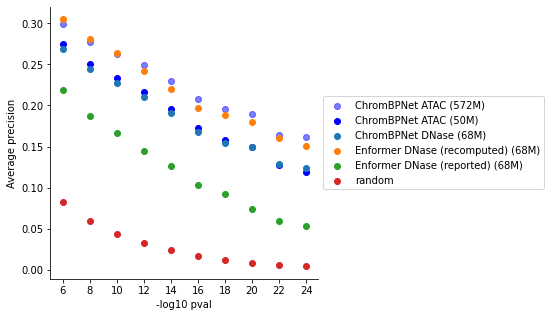

In [9]:

fig, ax = plt.subplots(figsize=(6,5))
colors = ["blue", "blue"]
alphas = [0.5, 1.0]
idx=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)"]:
    ax.scatter(np.arange(6,25,2).astype(str), chrombpnet[key], label=key, c="blue", alpha=alphas[idx])
    idx+=1
    
key="ChromBPNet DNase (68M)"
ax.scatter(np.arange(6,25,2).astype(str), chrombpnet[key], label=key)
print(key, chrombpnet[key])
ax.scatter(np.arange(6,25,2).astype(str), enformer_dnase_roc, label="Enformer DNase (recomputed) (68M)")
print("enf", enformer_dnase_roc)
ax.scatter(np.arange(6,25,2).astype(str), sar_enformer_dnase_roc, label="Enformer DNase (reported) (68M)")
print("enf", sar_enformer_dnase_roc)

ax.scatter(np.arange(6,25,2).astype(str), random_bc, label="random")

ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("-log10 pval")
ax.set_ylabel("Average precision")
#plt.legend(loc='upper right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.savefig("subfigs/kaur_caqtls_auprc_compare.pdf", transparent=True, dpi=300)

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


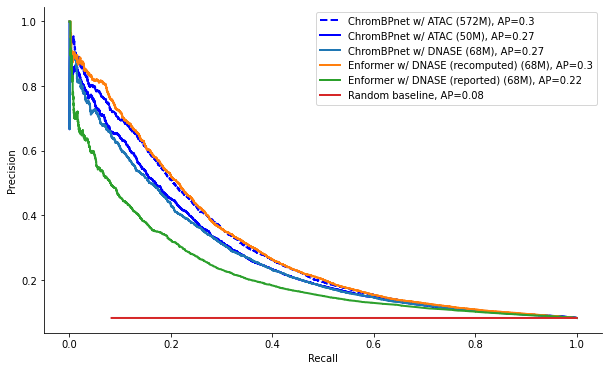

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
from sklearn.metrics import precision_recall_curve


fig, ax = plt.subplots(figsize=(10,6))

threshold=6
dataf1 = datafn[datafn["log10p"]>threshold]
dataf1["obs.label"] = 1


dataf2 = datafn[datafn["log10p"]<3]
dataf2["obs.label"] = 0

dataf = pd.concat([dataf1, dataf2])


######################################

keyd="pred.chrombpnet.encsr637xsc.variantscore.ips"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ ATAC (572M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="pred.chrombpnet.encsr637xsc_50m.variantscore.ips"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ ATAC (50M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="pred.chrombpnet.encsr000emt.variantscore.ips"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ DNASE (68M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="pred.enformer.encsr000emt.variantscore.local_logfc"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])
title="Enformer w/ DNASE (recomputed) (68M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
enformer_auc_recomp = roc_auc

ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################

# keyd="pred.enformer.encsr000emt.varscore.sad"
# label=dataf["var.label"].astype(int)
# score=abs(dataf[keyd])
# title="Enformer w/ DNASE SAD (50M)"

# fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
# roc_auc = metrics.average_precision_score(label, score)
# ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################


keyd="pred.enformer.encsr000emt.variantscore.global_sar"
label=dataf["obs.label"].astype(int)
score=abs(dataf[keyd])
title="Enformer w/ DNASE (reported) (68M)"


fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))
enformer_auc = roc_auc

######################################

roc_auc=sum(dataf["obs.label"]==1)/len(dataf["obs.label"])
ax.plot(fpr_chrombpnet, [sum(dataf["obs.label"]==1)/len(dataf["obs.label"])]*len(fpr_chrombpnet), linewidth=2, label="Random baseline, AP="+str(round(roc_auc,2)))


ax.spines[["top", "right"]].set_visible(False)
ax.legend(loc='upper right')
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

plt.savefig("subfigs/kaur_caqtls_auprc.pdf", transparent=True, dpi=300)

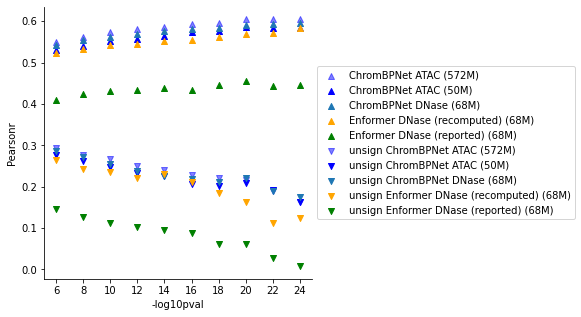

In [11]:
fig, ax = plt.subplots(figsize=(6,5))

colors = ["blue", "blue", "C0"]
alphas= [0.5, 1.0, 1.0, 1.0] 

i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    #print(len(chrombpnet_pear[key]))
    #print(len(np.arange(7,25,2)))
    #print(key)
    #print(chrombpnet_pear[key])
    ax.scatter(np.arange(6,25,2).astype(str), chrombpnet_pear[key], marker="^", label=key, color=colors[i], alpha=alphas[i])
    i+=1


ax.scatter(np.arange(6,25,2).astype(str), enformer_dnase_pear ,  marker="^", label="Enformer DNase (recomputed) (68M)", color="orange")
ax.scatter(np.arange(6,25,2).astype(str), sar_enformer_dnase_pear ,  marker="^", label="Enformer DNase (reported) (68M)", color="green")

i=0
for key in ["ChromBPNet ATAC (572M)",  "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(6,25,2).astype(str), chrombpnet_pear_abs[key], marker="v", label="unsign "+key, color=colors[i], alpha=alphas[i])
    i+=1
    
ax.scatter(np.arange(6,25,2).astype(str), enformer_dnase_pear_abs, marker="v", label="unsign " +"Enformer DNase (recomputed) (68M)", color="orange")
ax.scatter(np.arange(6,25,2).astype(str), sar_enformer_dnase_pear_abs, marker="v", label="unsign " +"Enformer DNase (reported) (68M)", color="green")


ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("-log10pval")
ax.set_ylabel("Pearsonr")
#plt.legend(loc='upper right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.show()
#plt.ylim((0.4,0.6))
plt.savefig("subfigs/kaur_caqtls_pearsonr_compare.pdf", transparent=True, dpi=300)


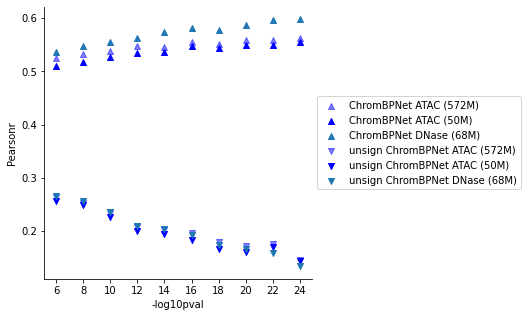

In [12]:
fig, ax = plt.subplots(figsize=(6,5))

colors = ["blue", "blue", "C0"]
alphas= [0.5, 1.0, 1.0, 1.0] 

i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    #print(len(chrombpnet_pear[key]))
    #print(len(np.arange(7,25,2)))
    #print(key)
    #print(chrombpnet_pear[key])
    ax.scatter(np.arange(6,25,2).astype(str), chrombpnet_pear1[key], marker="^", label=key, color=colors[i], alpha=alphas[i])
    i+=1


i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(6,25,2).astype(str), chrombpnet_pear_abs1[key], marker="v", label="unsign "+key, color=colors[i], alpha=alphas[i])
    i+=1


ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("-log10pval")
ax.set_ylabel("Pearsonr")
#plt.legend(loc='upper right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.show()
#plt.ylim((0.4,0.6))
plt.savefig("subfigs/kaur_caqtls_jsd_pearsonr_compare.pdf", transparent=True, dpi=300)


(0.5503226090758726, 0.0)
(0.29369901749973326, 5.95584883856596e-157)


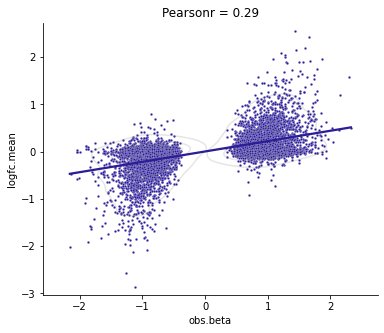

In [13]:
import seaborn as sns
import scipy

threshold=6
dataf1 = datafn[datafn["log10p"]>threshold]
   
data = pd.DataFrame()
data["logfc.mean"] = dataf1["pred.chrombpnet.encsr637xsc.variantscore.logfc"]
data["obs.beta"] = dataf1["obs.beta"]

plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="obs.beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="obs.beta", y="logfc.mean", data=data, s=6, color="#2B1C97", rasterized=True)
sns.regplot(x="obs.beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#2B1C97")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(data["logfc.mean"],data["obs.beta"])
print(atc_pear)
atc_pear = scipy.stats.pearsonr(abs(data["logfc.mean"]),abs(data["obs.beta"]))
print(atc_pear)
ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))


plt.savefig("subfigs/kaur_caqtls_pearsonr.pdf", transparent=True, dpi=300)